<a href="https://colab.research.google.com/github/meghana2343/ADS-Project/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [460]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [332]:

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving finaldataset.csv to finaldataset (5).csv


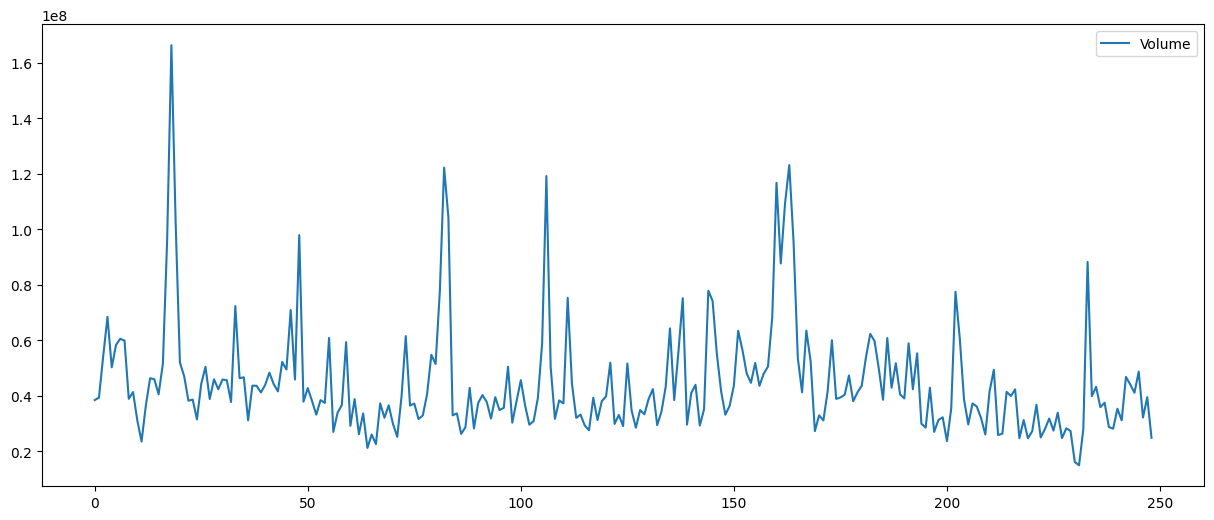

In [334]:
dataset = pd.read_csv("finaldataset.csv")
dataset.head(10)
dataset.plot(figsize=(15, 6))
plt.savefig('plot.png')

In [335]:
dataset.shape


(249, 6)

In [336]:
dataset.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/26/2025,$229.16,38497920,$230.74,$231.7474,$228.77
1,11/25/2025,$229.67,39379340,$226.38,$230.52,$223.80
2,11/24/2025,$226.28,54318400,$222.555,$227.33,$222.27
3,11/21/2025,$220.69,68490460,$216.345,$222.21,$215.18
4,11/20/2025,$217.14,50308960,$227.05,$227.41,$216.74


In [337]:
#preprocessing data


In [338]:
dataset.isna().sum()

,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [339]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        249 non-null    object
 1   Close/Last  249 non-null    object
 2   Volume      249 non-null    int64 
 3   Open        249 non-null    object
 4   High        249 non-null    object
 5   Low         249 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.8+ KB


In [340]:
#converting the 'Date' column into 'datetime' dtype
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [341]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        249 non-null    datetime64[ns]
 1   Close/Last  249 non-null    object        
 2   Volume      249 non-null    int64         
 3   Open        249 non-null    object        
 4   High        249 non-null    object        
 5   Low         249 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 11.8+ KB


In [342]:
#making the 'Date ' col as index
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)

In [343]:
dataset['Day'] = dataset.index.day
dataset['Month'] = dataset.index.month
dataset['Year'] = dataset.index.year
dataset['DayOfWeek'] = dataset.index.dayofweek

In [344]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2025-11-26 to 2024-11-29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  249 non-null    object
 1   Volume      249 non-null    int64 
 2   Open        249 non-null    object
 3   High        249 non-null    object
 4   Low         249 non-null    object
 5   Day         249 non-null    int32 
 6   Month       249 non-null    int32 
 7   Year        249 non-null    int32 
 8   DayOfWeek   249 non-null    int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 15.6+ KB


In [345]:
dataset.head()

,Close/Last,Volume,Open,High,Low,Day,Month,Year,DayOfWeek
Date,,,,,,,,,
2025-11-26,$229.16,38497920,$230.74,$231.7474,$228.77,26,11,2025,2
2025-11-25,$229.67,39379340,$226.38,$230.52,$223.80,25,11,2025,1
2025-11-24,$226.28,54318400,$222.555,$227.33,$222.27,24,11,2025,0
2025-11-21,$220.69,68490460,$216.345,$222.21,$215.18,21,11,2025,4
2025-11-20,$217.14,50308960,$227.05,$227.41,$216.74,20,11,2025,3


In [346]:
dataset.isna().sum()

,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0
Day,0
Month,0
Year,0
DayOfWeek,0


In [347]:
#sorting the indexes
dataset.sort_index(inplace=True)

In [348]:
# Remove $ and convert selected columns to numeric
cols = ['Close/Last', 'Open', 'High', 'Low']
for col in cols:
    dataset[col] = dataset[col].replace({r'\$': ''}, regex=True).astype(float)

In [349]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-11-29 to 2025-11-26
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  249 non-null    float64
 1   Volume      249 non-null    int64  
 2   Open        249 non-null    float64
 3   High        249 non-null    float64
 4   Low         249 non-null    float64
 5   Day         249 non-null    int32  
 6   Month       249 non-null    int32  
 7   Year        249 non-null    int32  
 8   DayOfWeek   249 non-null    int32  
dtypes: float64(4), int32(4), int64(1)
memory usage: 15.6 KB


In [350]:
dataset.head()

,Close/Last,Volume,Open,High,Low,Day,Month,Year,DayOfWeek
Date,,,,,,,,,
2024-11-29,207.89,24892450,205.83,208.20,204.5900,29,11,2024,4
2024-12-02,210.71,39523190,209.96,212.99,209.5101,2,12,2024,0
2024-12-03,213.44,32214830,210.31,214.02,209.6500,3,12,2024,1
2024-12-04,218.16,48745720,215.96,220.00,215.7500,4,12,2024,2
2024-12-05,220.55,41140220,218.03,222.15,217.3000,5,12,2024,3


In [384]:
dataset.isna().sum()

,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0
Day,0
Month,0
Year,0
DayOfWeek,0


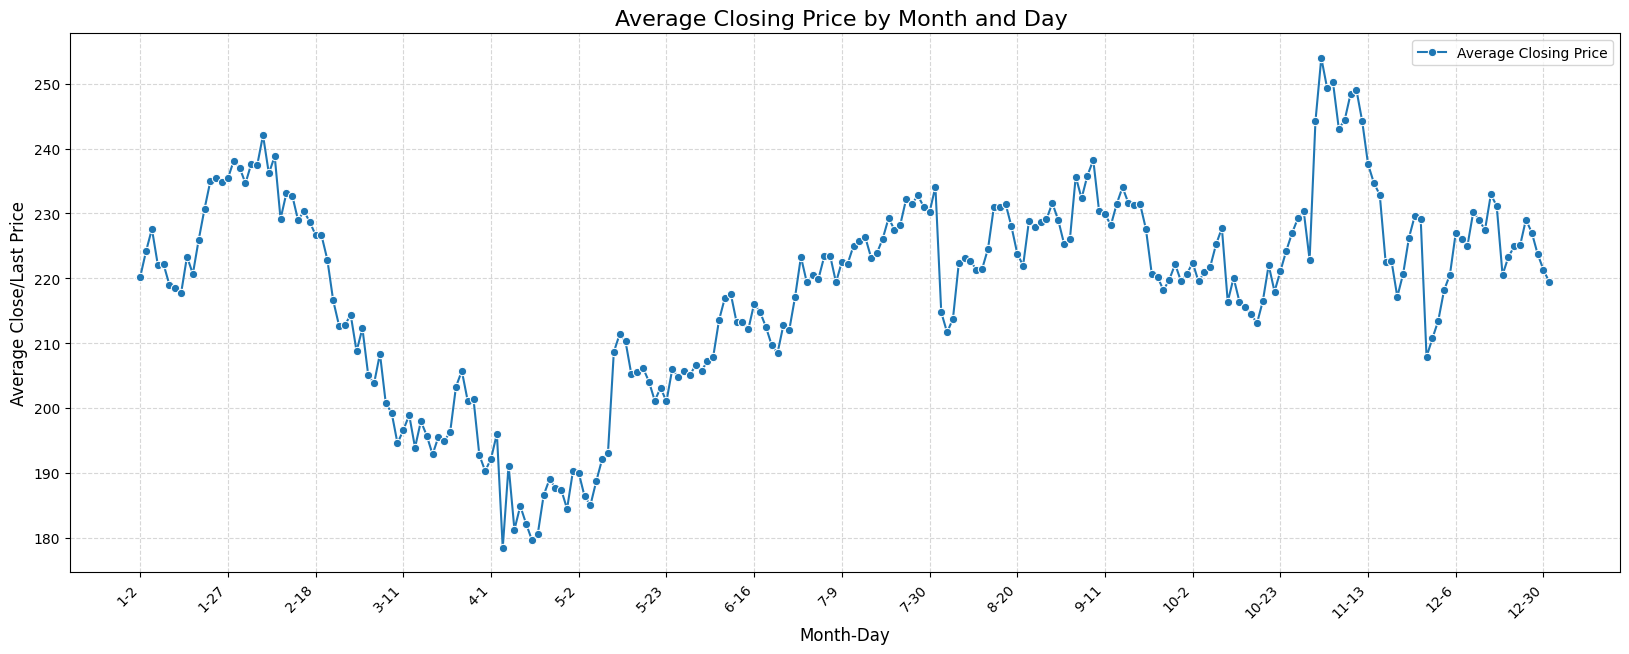

In [385]:

# Group by Month and Day and calculate the mean of 'Close/Last'
daily_avg_price = dataset.groupby(['Month', 'Day'])['Close/Last'].mean().reset_index()

# Create a combined 'Month-Day' string for plotting
daily_avg_price['Month_Day'] = daily_avg_price['Month'].astype(str) + '-' + daily_avg_price['Day'].astype(str)

# Plotting the average 'Close/Last' price by month and day
plt.figure(figsize=(20, 7))
sns.lineplot(x='Month_Day', y='Close/Last', data=daily_avg_price, marker='o', label='Average Closing Price')
plt.title('Average Closing Price by Month and Day ', fontsize=16)
plt.xlabel('Month-Day', fontsize=12)
plt.ylabel('Average Close/Last Price', fontsize=12)

# Correcting the x-axis labels for better readability
step = 15 # Display every 15th label
num_labels = len(daily_avg_price['Month_Day'])
selected_indices = np.arange(0, num_labels, step)
selected_labels = daily_avg_price['Month_Day'].iloc[selected_indices]

plt.xticks(selected_indices, selected_labels, rotation=45, ha='right', fontsize=10) # Rotate labels, increase fontsize
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout
plt.show()

Outlier Detection & Treatment

✔ Using IQR method


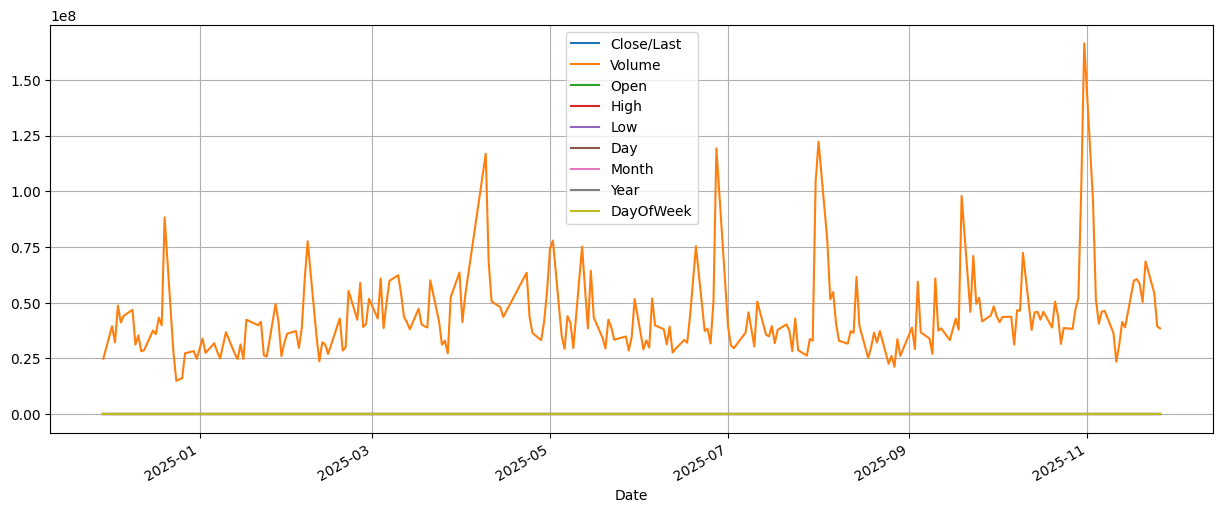

In [386]:
Q1 = dataset['Close/Last'].quantile(0.25)
Q3 = dataset['Close/Last'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['Close/Last'] >= Q1 - 1.5*IQR) &
                  (dataset['Close/Last'] <= Q3 + 1.5*IQR)]
dataset.plot(figsize=(15, 6))
plt.legend()
plt.grid(True)
plt.show()


Closing Price Trend

<Axes: title={'center': 'Amazon Closing Price Trend'}, xlabel='Date'>

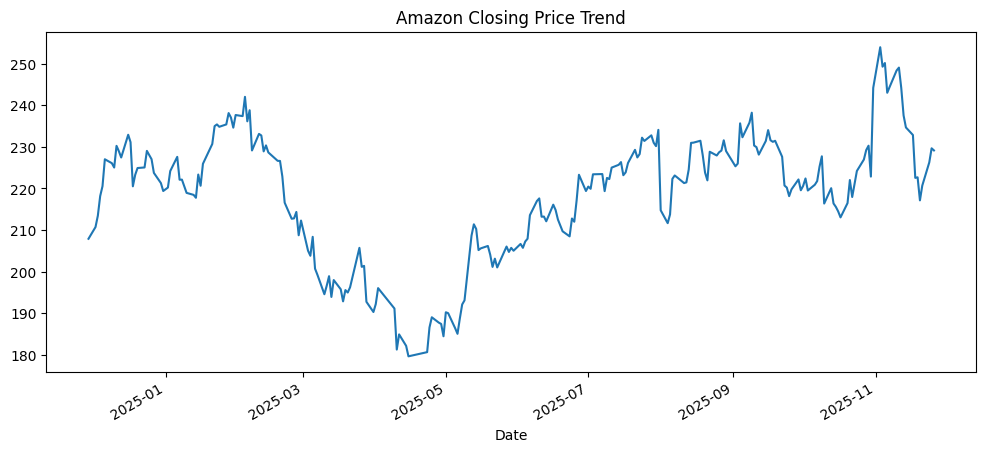

In [387]:
dataset['Close/Last'].plot(figsize=(12,5), title="Amazon Closing Price Trend")

Volume Trend

<Axes: title={'center': 'Trading Volume'}, xlabel='Date'>

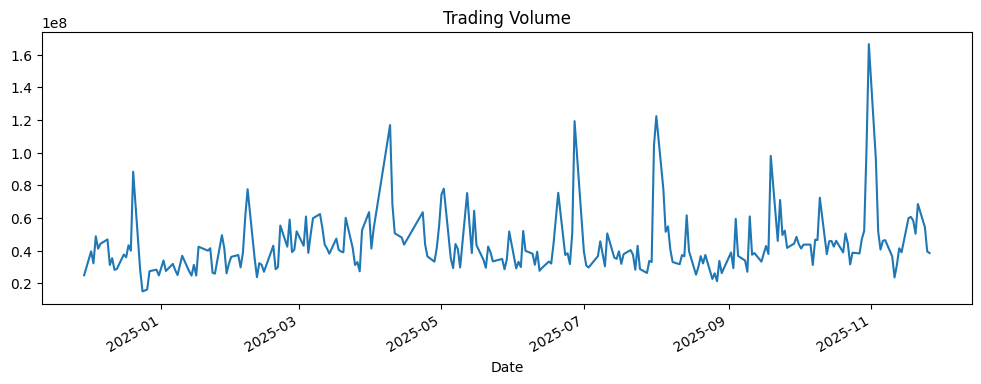

In [388]:
dataset['Volume'].plot(figsize=(12,4), title="Trading Volume")

In [389]:
##data normalization
scaler = MinMaxScaler()

scaler_values = scaler.fit_transform(dataset[dataset.columns])

In [390]:
scaler_values

array([[0.38032523, 0.06531907, 0.40500931, ..., 0.90909091, 0.        ,
        1.        ],
       [0.41822336, 0.16199799, 0.4546219 , ..., 1.        , 0.        ,
        0.        ],
       [0.45491197, 0.11370485, 0.45882636, ..., 1.        , 0.        ,
        0.25      ],
       ...,
       [0.62746943, 0.25976371, 0.60592228, ..., 0.90909091, 1.        ,
        0.        ],
       [0.67302782, 0.16104744, 0.65187098, ..., 0.90909091, 1.        ,
        0.25      ],
       [0.6661739 , 0.15522307, 0.7042465 , ..., 0.90909091, 1.        ,
        0.5       ]])

In [391]:
dataset_scaled=pd.DataFrame(scaler_values,columns=dataset.columns, index=dataset.index)

In [392]:
dataset_scaled.head()

,Close/Last,Volume,Open,High,Low,Day,Month,Year,DayOfWeek
Date,,,,,,,,,
2024-11-29,0.380325,0.065319,0.405009,0.339016,0.417741,0.933333,0.909091,0.0,1.00
2024-12-02,0.418223,0.161998,0.454622,0.401836,0.477041,0.033333,1.000000,0.0,0.00
2024-12-03,0.454912,0.113705,0.458826,0.415344,0.478727,0.066667,1.000000,0.0,0.25
2024-12-04,0.518344,0.222940,0.526698,0.493770,0.552248,0.100000,1.000000,0.0,0.50
2024-12-05,0.550464,0.172683,0.551565,0.521967,0.570929,0.133333,1.000000,0.0,0.75


In [393]:
# Display dataset_scaled.head() with index formatted as MM-DD
print("Dataset Scaled Head with Month-Day Index:")
df_display = dataset_scaled.copy()
df_display.index = df_display.index.strftime('%m-%d')
print(df_display.head())

Dataset Scaled Head with Month-Day Index:
       Close/Last    Volume      Open      High       Low       Day     Month  \
Date                                                                            
11-29    0.380325  0.065319  0.405009  0.339016  0.417741  0.933333  0.909091   
12-02    0.418223  0.161998  0.454622  0.401836  0.477041  0.033333  1.000000   
12-03    0.454912  0.113705  0.458826  0.415344  0.478727  0.066667  1.000000   
12-04    0.518344  0.222940  0.526698  0.493770  0.552248  0.100000  1.000000   
12-05    0.550464  0.172683  0.551565  0.521967  0.570929  0.133333  1.000000   

       Year  DayOfWeek  
Date                    
11-29   0.0       1.00  
12-02   0.0       0.00  
12-03   0.0       0.25  
12-04   0.0       0.50  
12-05   0.0       0.75  


plotting the columns


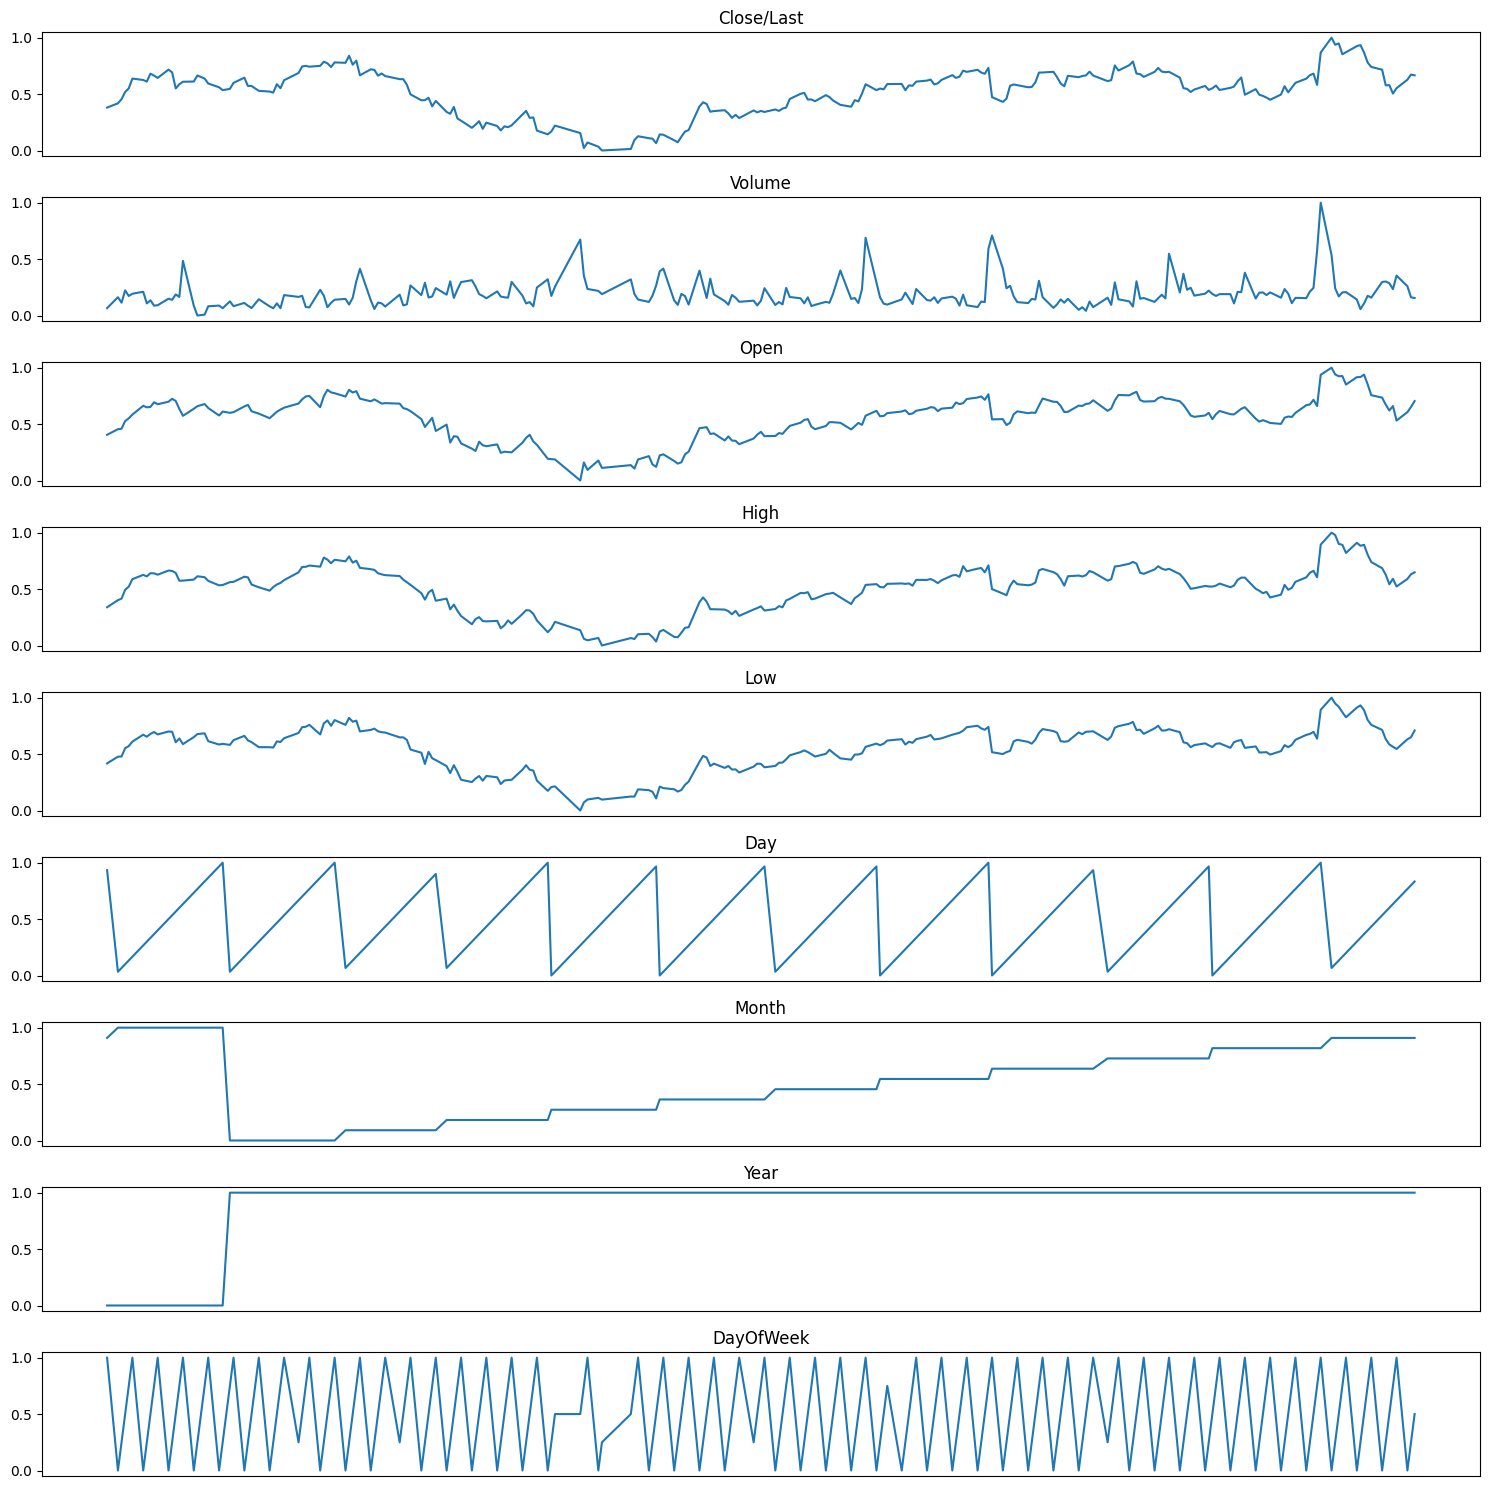

In [394]:
from matplotlib import axes
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(9)

for ax, col  in zip(axes.flatten(), dataset_scaled.columns):
    ax.plot(dataset_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

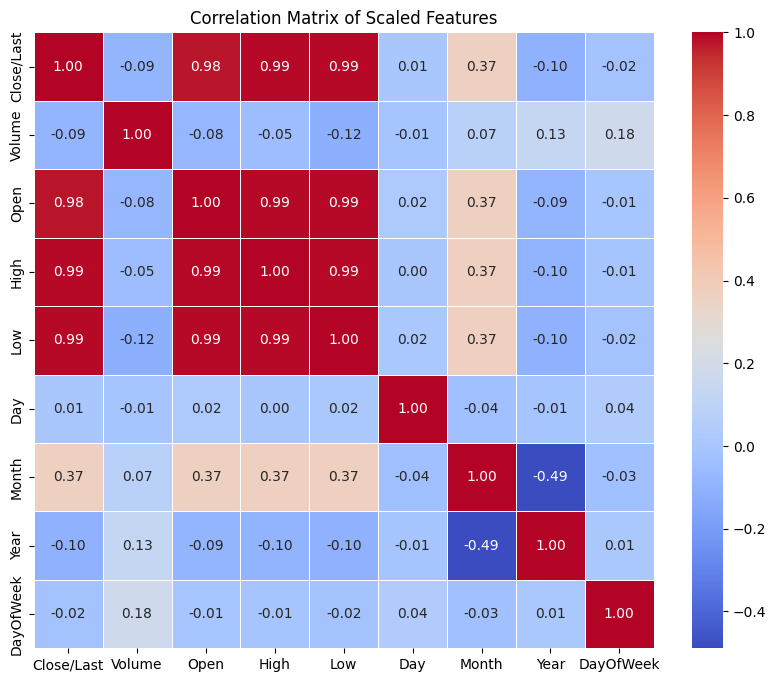

In [453]:
correlation_matrix = dataset_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Scaled Features')
plt.show()

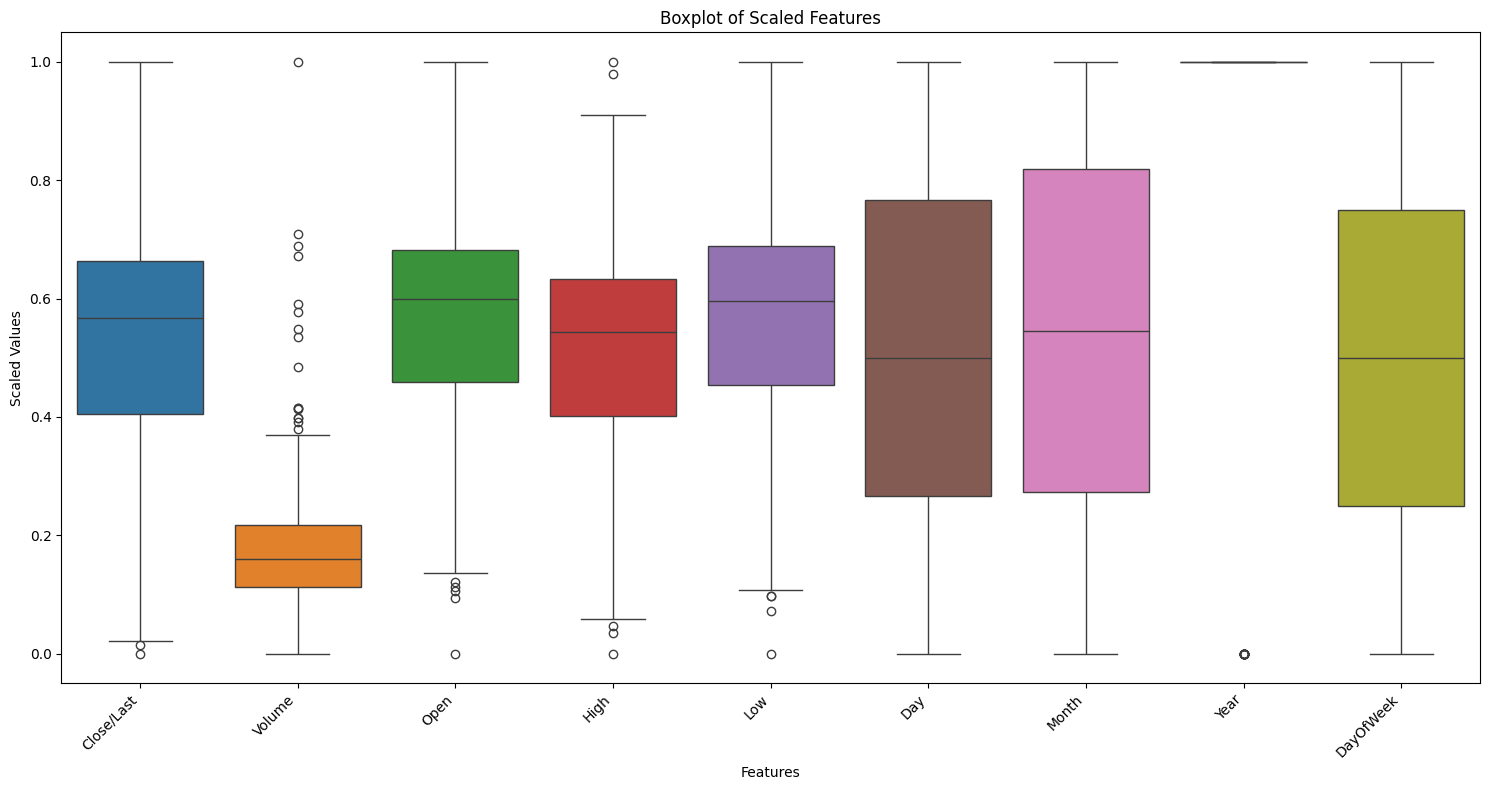

In [454]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset_scaled)
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

****creating the sliding window sequences

In [395]:
def create_sequences(data,window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X),np.array(y)

In [396]:
window_size=46
X,y = create_sequences(dataset_scaled, window_size)

In [397]:
X

array([[[0.38032523, 0.06531907, 0.40500931, ..., 0.90909091,
         0.        , 1.        ],
        [0.41822336, 0.16199799, 0.4546219 , ..., 1.        ,
         0.        , 0.        ],
        [0.45491197, 0.11370485, 0.45882636, ..., 1.        ,
         0.        , 0.25      ],
        ...,
        [0.8395377 , 0.09717828, 0.80359181, ..., 0.09090909,
         1.        , 0.25      ],
        [0.76038167, 0.15743092, 0.77968647, ..., 0.09090909,
         1.        , 0.5       ],
        [0.79612955, 0.30323531, 0.79157907, ..., 0.09090909,
         1.        , 0.75      ]],

       [[0.41822336, 0.16199799, 0.4546219 , ..., 1.        ,
         0.        , 0.        ],
        [0.45491197, 0.11370485, 0.45882636, ..., 1.        ,
         0.        , 0.25      ],
        [0.51834431, 0.22293983, 0.5266983 , ..., 1.        ,
         0.        , 0.5       ],
        ...,
        [0.76038167, 0.15743092, 0.77968647, ..., 0.09090909,
         1.        , 0.5       ],
        [0.7

In [398]:
y

array([[0.66603951, 0.41320569, 0.72538891, ..., 0.09090909, 1.        ,
        1.        ],
       [0.71966134, 0.13488393, 0.70190402, ..., 0.09090909, 1.        ,
        0.        ],
       [0.7145545 , 0.05753017, 0.71842153, ..., 0.09090909, 1.        ,
        0.25      ],
       ...,
       [0.62746943, 0.25976371, 0.60592228, ..., 0.90909091, 1.        ,
        0.        ],
       [0.67302782, 0.16104744, 0.65187098, ..., 0.90909091, 1.        ,
        0.25      ],
       [0.6661739 , 0.15522307, 0.7042465 , ..., 0.90909091, 1.        ,
        0.5       ]])

In [399]:
X.shape, y.shape

((195, 46, 9), (195, 9))

Train test split

In [400]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train.shape, X_test.shape

((156, 46, 9), (39, 46, 9))

building linear regression

In [401]:
# Reshape X_train and X_test, so that it is suitable for linear regression
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)



In [402]:

# Initialize and train the Linear Regression model
lm = LinearRegression()
lm.fit(X_train_reshaped, y_train)

# Make predictions on the test data
y_pred_linear = lm.predict(X_test_reshaped)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Model:")
print(f"  Mean Squared Error: {mse_linear:.4f}")
print(f"  Root Mean Squared Error: {rmse_linear:.4f}")
print(f"  R-squared: {r2_linear:.4f}")

Linear Regression Model:
  Mean Squared Error: 0.0431
  Root Mean Squared Error: 0.2075
  R-squared: -0.0211


In [403]:
linear_predictions_df = pd.DataFrame({'actual':y_pred_linear.flatten()})

In [404]:
dataset.head(5)

,Close/Last,Volume,Open,High,Low,Day,Month,Year,DayOfWeek
Date,,,,,,,,,
2024-11-29,207.89,24892450,205.83,208.20,204.5900,29,11,2024,4
2024-12-02,210.71,39523190,209.96,212.99,209.5101,2,12,2024,0
2024-12-03,213.44,32214830,210.31,214.02,209.6500,3,12,2024,1
2024-12-04,218.16,48745720,215.96,220.00,215.7500,4,12,2024,2
2024-12-05,220.55,41140220,218.03,222.15,217.3000,5,12,2024,3


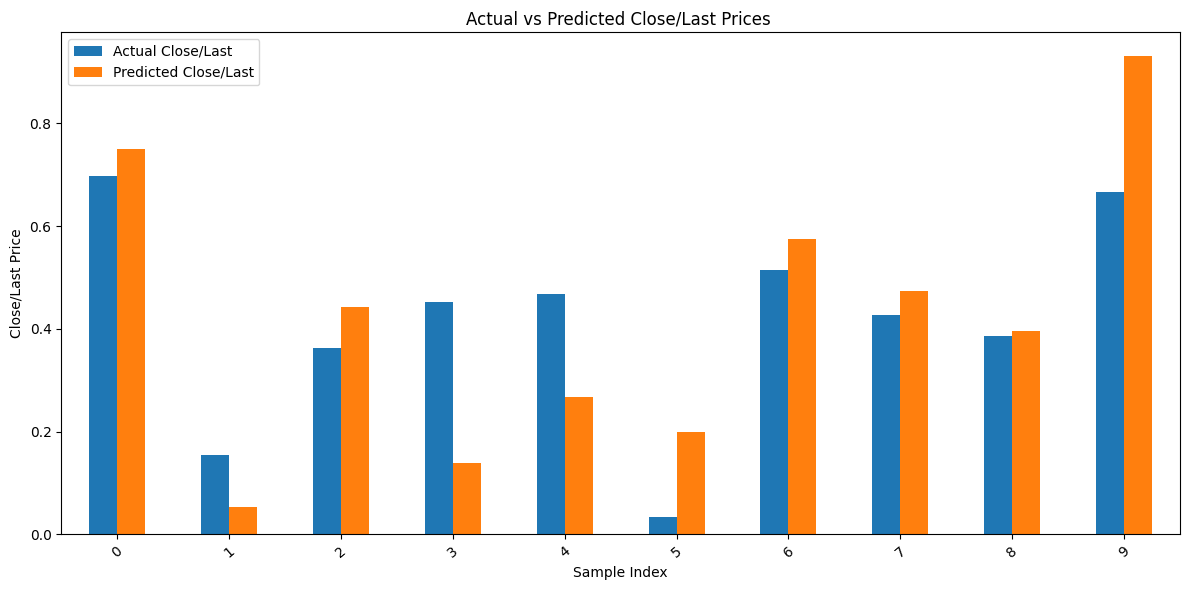

In [405]:
# Create a DataFrame for plotting actual vs. predicted values for 'Close/Last'
plot_df = pd.DataFrame({
    'Actual Close/Last': y_test[:10, 0],  # Taking first 10 samples of the first feature
    'Predicted Close/Last': y_pred_linear[:10, 0] # Taking first 10 samples of the first feature
})

# Plotting the comparison
plot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Close/Last Prices ')
plt.xlabel('Sample Index')
plt.ylabel('Close/Last Price')
plt.xticks(rotation=40)
plt.legend()
plt.tight_layout()
plt.show()

In [406]:
import math
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('R2 Score:', metrics.r2_score(y_test, y_pred_linear))

Root Mean Squared Error: 0.20750594142016937
Mean Absolute Error: 0.11846599273881858
Mean Squared Error: 0.04305871572467076
R2 Score: -0.021088331474191226


Building LSTM MODEL

In [407]:
model = keras.Sequential([
    #adding the first LSTM layer
    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.2),

    #adding the second LSTM layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.2),
    #adding the third LSTM layer
    keras.layers.LSTM(units=50, return_sequences=False),
    keras.layers.Dropout(0.2),

    #adding output layer
    keras.layers.Dense(y_train.shape[1])

])

In [408]:
# compilation
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])

In [409]:
# early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=15,
                               restore_best_weights=True)

In [410]:
lstm_model = model.fit(X_train, y_train, epochs=100,
                       batch_size=2, validation_split=0.25,
                       callbacks=[early_stopping])

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - RootMeanSquaredError: 0.4181 - loss: 0.1828 - val_RootMeanSquaredError: 0.2194 - val_loss: 0.0482
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - RootMeanSquaredError: 0.2511 - loss: 0.0631 - val_RootMeanSquaredError: 0.2009 - val_loss: 0.0404
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - RootMeanSquaredError: 0.2308 - loss: 0.0533 - val_RootMeanSquaredError: 0.1879 - val_loss: 0.0353
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - RootMeanSquaredError: 0.2182 - loss: 0.0477 - val_RootMeanSquaredError: 0.1828 - val_loss: 0.0334
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - RootMeanSquaredError: 0.2140 - loss: 0.0458 - val_RootMeanSquaredError: 0.1892 - val_loss: 0.0358
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - RootMeanSquaredError: 0.1966 - loss: 0.0387 - val_RootMeanSquaredError: 0.1849 - val_loss: 0.0342
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - RootMeanSquaredError: 0.2121 - lo

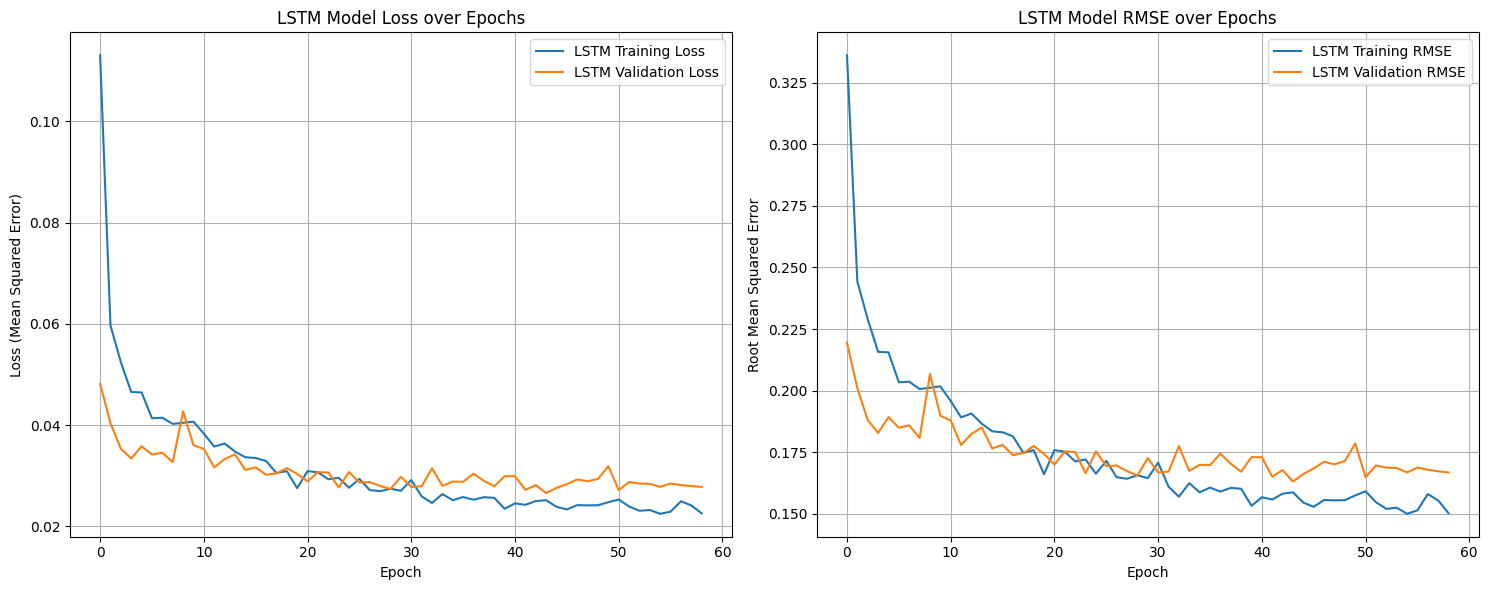

In [422]:
import matplotlib.pyplot as plt

# Plotting training history for LSTM model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_model.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_model.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(lstm_model.history['RootMeanSquaredError'], label='LSTM Training RMSE')
plt.plot(lstm_model.history['val_RootMeanSquaredError'], label='LSTM Validation RMSE')
plt.title('LSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [411]:
lstm_model.history

{'RootMeanSquaredError': [0.33626043796539307,
  0.24430057406425476,
  0.22898143529891968,
  0.2157069742679596,
  0.2155180126428604,
  0.2033437043428421,
  0.2035810649394989,
  0.20059534907341003,
  0.20112955570220947,
  0.20168618857860565,
  0.19574789702892303,
  0.18906447291374207,
  0.1906632035970688,
  0.1864866018295288,
  0.18341544270515442,
  0.18302148580551147,
  0.1813904196023941,
  0.17471058666706085,
  0.1757821887731552,
  0.16593903303146362,
  0.17579644918441772,
  0.17513512074947357,
  0.1711743175983429,
  0.17198345065116882,
  0.16617614030838013,
  0.17137882113456726,
  0.16476432979106903,
  0.16412930190563202,
  0.16558298468589783,
  0.16436192393302917,
  0.1707124561071396,
  0.16095854341983795,
  0.15685440599918365,
  0.16236114501953125,
  0.15863387286663055,
  0.16055095195770264,
  0.1589123159646988,
  0.16043062508106232,
  0.16006891429424286,
  0.1531669646501541,
  0.1566065549850464,
  0.15570567548274994,
  0.1580571085214615,
 

In [412]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step


forecasting the data


In [414]:
##inverse scaling
predictions_inverse = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [415]:
predictions_inverse[:10]

array([[2.2123787e+02, 3.9201660e+07, 2.2120813e+02, 2.2282709e+02,
        2.1841452e+02, 1.6942902e+01, 7.9615397e+00, 2.0250155e+03,
        1.9433762e+00],
       [1.9135982e+02, 4.4181748e+07, 1.9133302e+02, 1.9385062e+02,
        1.8824776e+02, 8.3964911e+00, 3.9651287e+00, 2.0249939e+03,
        1.6941504e+00],
       [2.0395810e+02, 4.6951700e+07, 2.0391158e+02, 2.0677971e+02,
        2.0016722e+02, 1.2457175e+01, 5.4878664e+00, 2.0249868e+03,
        1.8063107e+00],
       [2.1524648e+02, 3.8016672e+07, 2.1526210e+02, 2.1707452e+02,
        2.1283000e+02, 1.4025230e+01, 6.0540161e+00, 2.0250116e+03,
        1.9059842e+00],
       [2.2045206e+02, 3.4006420e+07, 2.1982071e+02, 2.2271092e+02,
        2.1626053e+02, 2.5852829e+01, 2.6338670e+00, 2.0250195e+03,
        2.3778336e+00],
       [1.8950444e+02, 4.1917160e+07, 1.8909064e+02, 1.9173412e+02,
        1.8693567e+02, 1.1899415e+01, 3.9204669e+00, 2.0250028e+03,
        1.7684133e+00],
       [2.1967523e+02, 4.1617424e+07, 2.

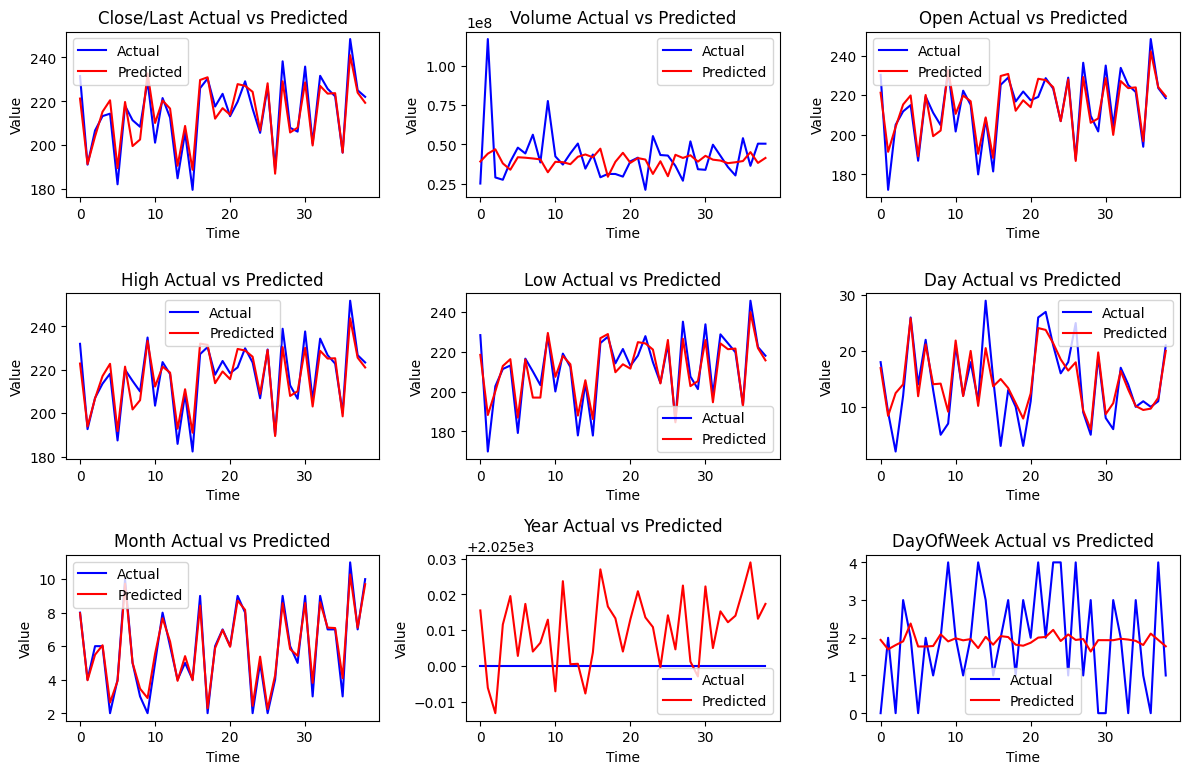

In [419]:
#plotting the results
plt.figure(figsize=(12, 8))
for i, col in enumerate(dataset.columns):
    plt.subplot(3, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], label='Actual', color='blue')
    plt.plot(predictions_inverse[:, i], label='Predicted', color='red')
    plt.title(f'{col} Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [421]:
import math
from sklearn import metrics

# Evaluate LSTM model predictions
rmse_lstm = np.sqrt(metrics.mean_squared_error(y_test_rescaled, predictions_inverse))
mae_lstm = metrics.mean_absolute_error(y_test_rescaled, predictions_inverse)
mse_lstm = metrics.mean_squared_error(y_test_rescaled, predictions_inverse)
r2_lstm = metrics.r2_score(y_test_rescaled, predictions_inverse)

print(f"LSTM Model Performance:")
print(f"  Root Mean Squared Error: {rmse_lstm:.4f}")
print(f"  Mean Absolute Error: {mae_lstm:.4f}")
print(f"  Mean Squared Error: {mse_lstm:.4f}")
print(f"  R2 Score: {r2_lstm:.4f}")

LSTM Model Performance:
  Root Mean Squared Error: 5680852.9730
  Mean Absolute Error: 1246708.9723
  Mean Squared Error: 32272090500683.1875
  R2 Score: 0.5675


building bilstm

In [423]:
model_bilstm = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=False)),
    Dropout(0.3),
    Dense(y_train.shape[1])
])

# Compilation
model_bilstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

# Early stopping
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=100, batch_size=2, validation_split=0.25, callbacks=[early_stopping_bilstm])

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - RootMeanSquaredError: 0.3554 - loss: 0.1294 - val_RootMeanSquaredError: 0.2070 - val_loss: 0.0428
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - RootMeanSquaredError: 0.2398 - loss: 0.0578 - val_RootMeanSquaredError: 0.1962 - val_loss: 0.0385
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - RootMeanSquaredError: 0.2281 - loss: 0.0522 - val_RootMeanSquaredError: 0.1929 - val_loss: 0.0372
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - RootMeanSquaredError: 0.2121 - loss: 0.0454 - val_RootMeanSquaredError: 0.1945 - val_loss: 0.0378
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - RootMeanSquaredError: 0.2024 - loss: 0.0410 - val_RootMeanSquaredError: 0.1782 - val_loss: 0.0317
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - RootMeanSquaredError: 0.1893 - loss: 0.0359 - val_RootMeanSquaredError: 0.1826 - val_loss: 0.0334
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - RootMeanSquaredError: 0.187

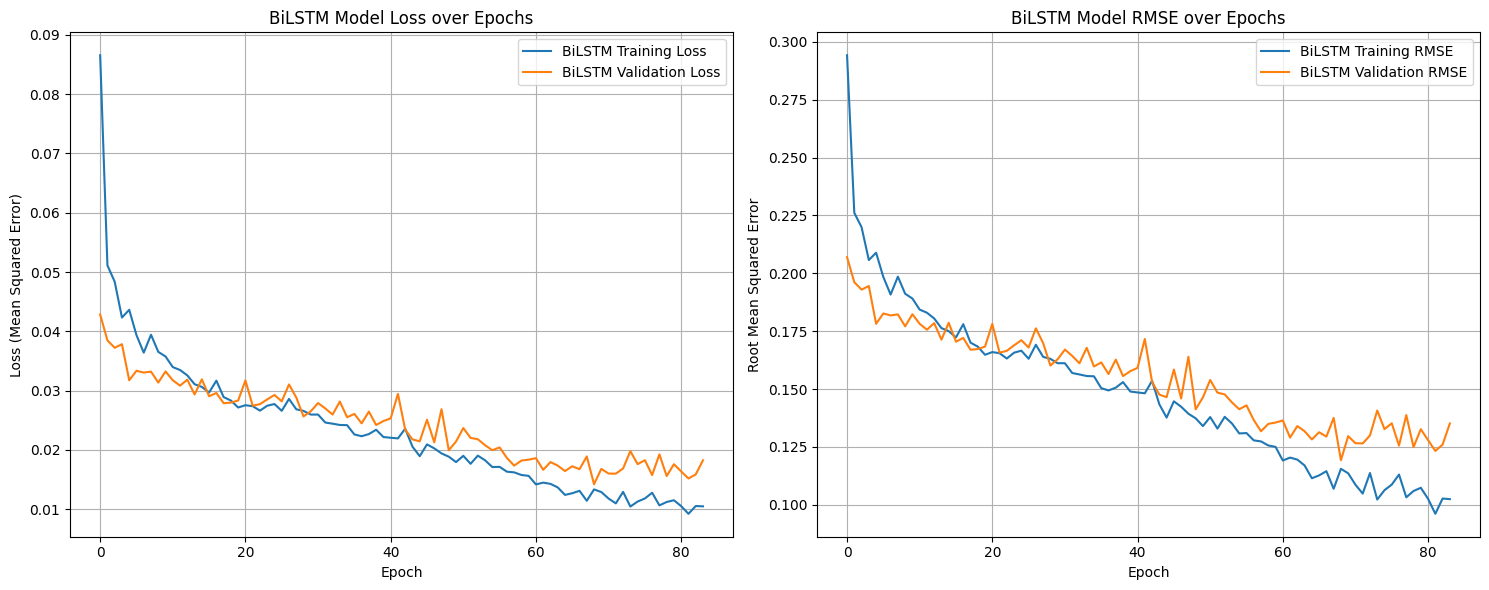

In [425]:
import matplotlib.pyplot as plt

# Plotting training history for BiLSTM model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss')
plt.title('BiLSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['RootMeanSquaredError'], label='BiLSTM Training RMSE')
plt.plot(history_bilstm.history['val_RootMeanSquaredError'], label='BiLSTM Validation RMSE')
plt.title('BiLSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [427]:
history_bilstm.history

{'RootMeanSquaredError': [0.2942184805870056,
  0.22611618041992188,
  0.21993637084960938,
  0.20573720335960388,
  0.20889589190483093,
  0.19838950037956238,
  0.190815731883049,
  0.19857169687747955,
  0.19117368757724762,
  0.18910475075244904,
  0.18432603776454926,
  0.18297117948532104,
  0.180489182472229,
  0.17631465196609497,
  0.17501431703567505,
  0.17231117188930511,
  0.17800801992416382,
  0.17004026472568512,
  0.1683233380317688,
  0.16480493545532227,
  0.16596034169197083,
  0.16548308730125427,
  0.16317905485630035,
  0.16570430994033813,
  0.16656386852264404,
  0.1630842238664627,
  0.16913075745105743,
  0.1638936996459961,
  0.16304194927215576,
  0.16114450991153717,
  0.16114814579486847,
  0.1569158434867859,
  0.15629485249519348,
  0.15561453998088837,
  0.15549993515014648,
  0.1503795087337494,
  0.1493847519159317,
  0.15058740973472595,
  0.15299442410469055,
  0.1489250510931015,
  0.14850951731204987,
  0.14815199375152588,
  0.15356135368347168,

In [428]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [429]:
##inverse scaling
predictions_inverse = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [430]:
predictions_inverse[:10]

array([[2.2123787e+02, 3.9201660e+07, 2.2120813e+02, 2.2282709e+02,
        2.1841452e+02, 1.6942902e+01, 7.9615397e+00, 2.0250155e+03,
        1.9433762e+00],
       [1.9135982e+02, 4.4181748e+07, 1.9133302e+02, 1.9385062e+02,
        1.8824776e+02, 8.3964911e+00, 3.9651287e+00, 2.0249939e+03,
        1.6941504e+00],
       [2.0395810e+02, 4.6951700e+07, 2.0391158e+02, 2.0677971e+02,
        2.0016722e+02, 1.2457175e+01, 5.4878664e+00, 2.0249868e+03,
        1.8063107e+00],
       [2.1524648e+02, 3.8016672e+07, 2.1526210e+02, 2.1707452e+02,
        2.1283000e+02, 1.4025230e+01, 6.0540161e+00, 2.0250116e+03,
        1.9059842e+00],
       [2.2045206e+02, 3.4006420e+07, 2.1982071e+02, 2.2271092e+02,
        2.1626053e+02, 2.5852829e+01, 2.6338670e+00, 2.0250195e+03,
        2.3778336e+00],
       [1.8950444e+02, 4.1917160e+07, 1.8909064e+02, 1.9173412e+02,
        1.8693567e+02, 1.1899415e+01, 3.9204669e+00, 2.0250028e+03,
        1.7684133e+00],
       [2.1967523e+02, 4.1617424e+07, 2.

In [436]:

import math
from sklearn import metrics

rmse_bilstm = np.sqrt(metrics.mean_squared_error(y_test_rescaled_bilstm, bilstm_predictions_inverse))
mae_bilstm = metrics.mean_absolute_error(y_test_rescaled_bilstm, bilstm_predictions_inverse)
mse_bilstm = metrics.mean_squared_error(y_test_rescaled_bilstm, bilstm_predictions_inverse)
r2_bilstm = metrics.r2_score(y_test_rescaled_bilstm, bilstm_predictions_inverse)

print(f"BiLSTM Model Performance:")
print(f"  Root Mean Squared Error: {rmse_bilstm:.4f}")
print(f"  Mean Absolute Error: {mae_bilstm:.4f}")
print(f"  Mean Squared Error: {mse_bilstm:.4f}")
print(f"  R2 Score: {r2_bilstm:.4f}")

BiLSTM Model Performance:
  Root Mean Squared Error: 5113931.4653
  Mean Absolute Error: 1090625.8025
  Mean Squared Error: 26152295032035.2031
  R2 Score: 0.6535


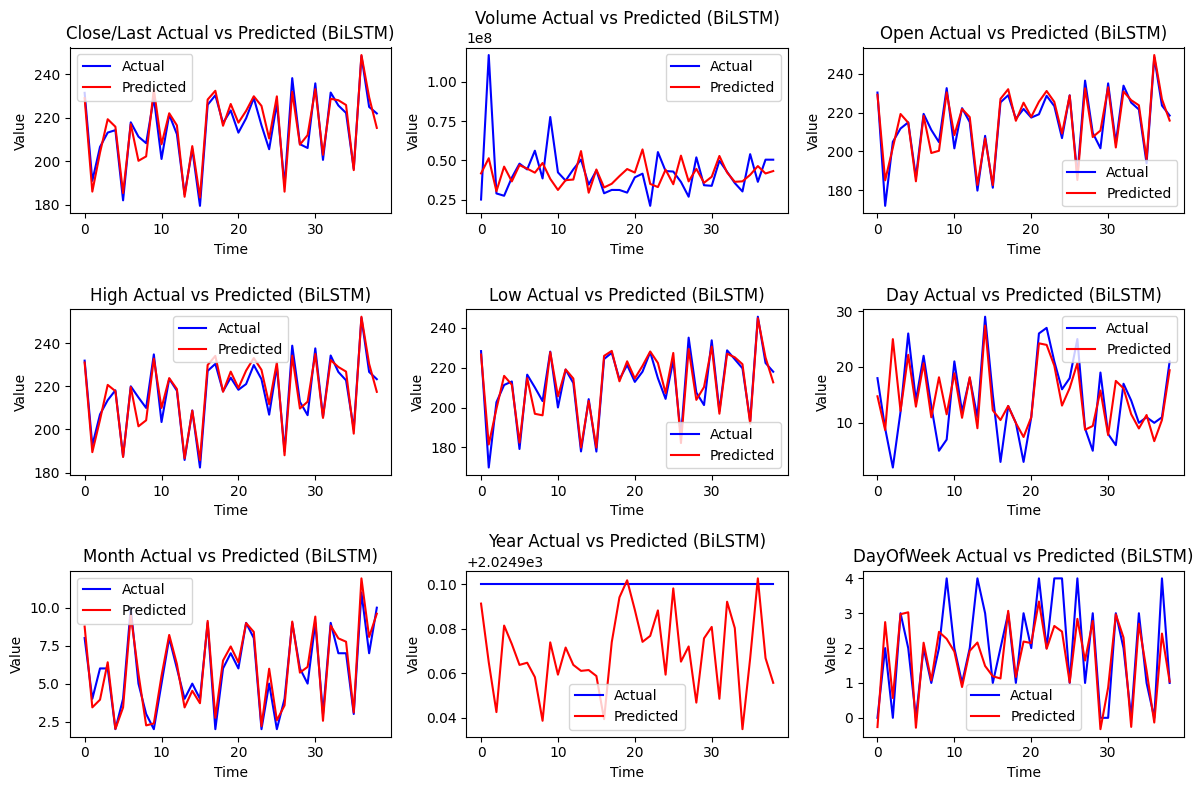

In [438]:
# Plotting the results for BiLSTM
plt.figure(figsize=(12, 8))
for i, col in enumerate(dataset.columns):
    plt.subplot(3, 3, i + 1)  # Use 3x3 grid for 9 features
    plt.plot(y_test_rescaled_bilstm[:, i], label='Actual', color='blue')
    plt.plot(bilstm_predictions_inverse[:, i], label='Predicted', color='red')
    plt.title(f'{col} Actual vs Predicted (BiLSTM)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [434]:
import math
from sklearn import metrics

# Extract 'Close/Last' column for actual and predicted values
actual_close_last = y_test_rescaled_bilstm[:, 0]
predicted_close_last = bilstm_predictions_inverse[:, 0]

# Evaluate BiLSTM model performance for 'Close/Last' only
rmse_bilstm_close = np.sqrt(metrics.mean_squared_error(actual_close_last, predicted_close_last))
mae_bilstm_close = metrics.mean_absolute_error(actual_close_last, predicted_close_last)
mse_bilstm_close = metrics.mean_squared_error(actual_close_last, predicted_close_last)
r2_bilstm_close = metrics.r2_score(actual_close_last, predicted_close_last)

print(f"BiLSTM Model Performance for 'Close/Last' feature:")
print(f"  Root Mean Squared Error: {rmse_bilstm_close:.4f}")
print(f"  Mean Absolute Error: {mae_bilstm_close:.4f}")
print(f"  Mean Squared Error: {mse_bilstm_close:.4f}")
print(f"  R2 Score: {r2_bilstm_close:.4f}")

BiLSTM Model Performance for 'Close/Last' feature:
  Root Mean Squared Error: 4.2357
  Mean Absolute Error: 3.5022
  Mean Squared Error: 17.9412
  R2 Score: 0.9276


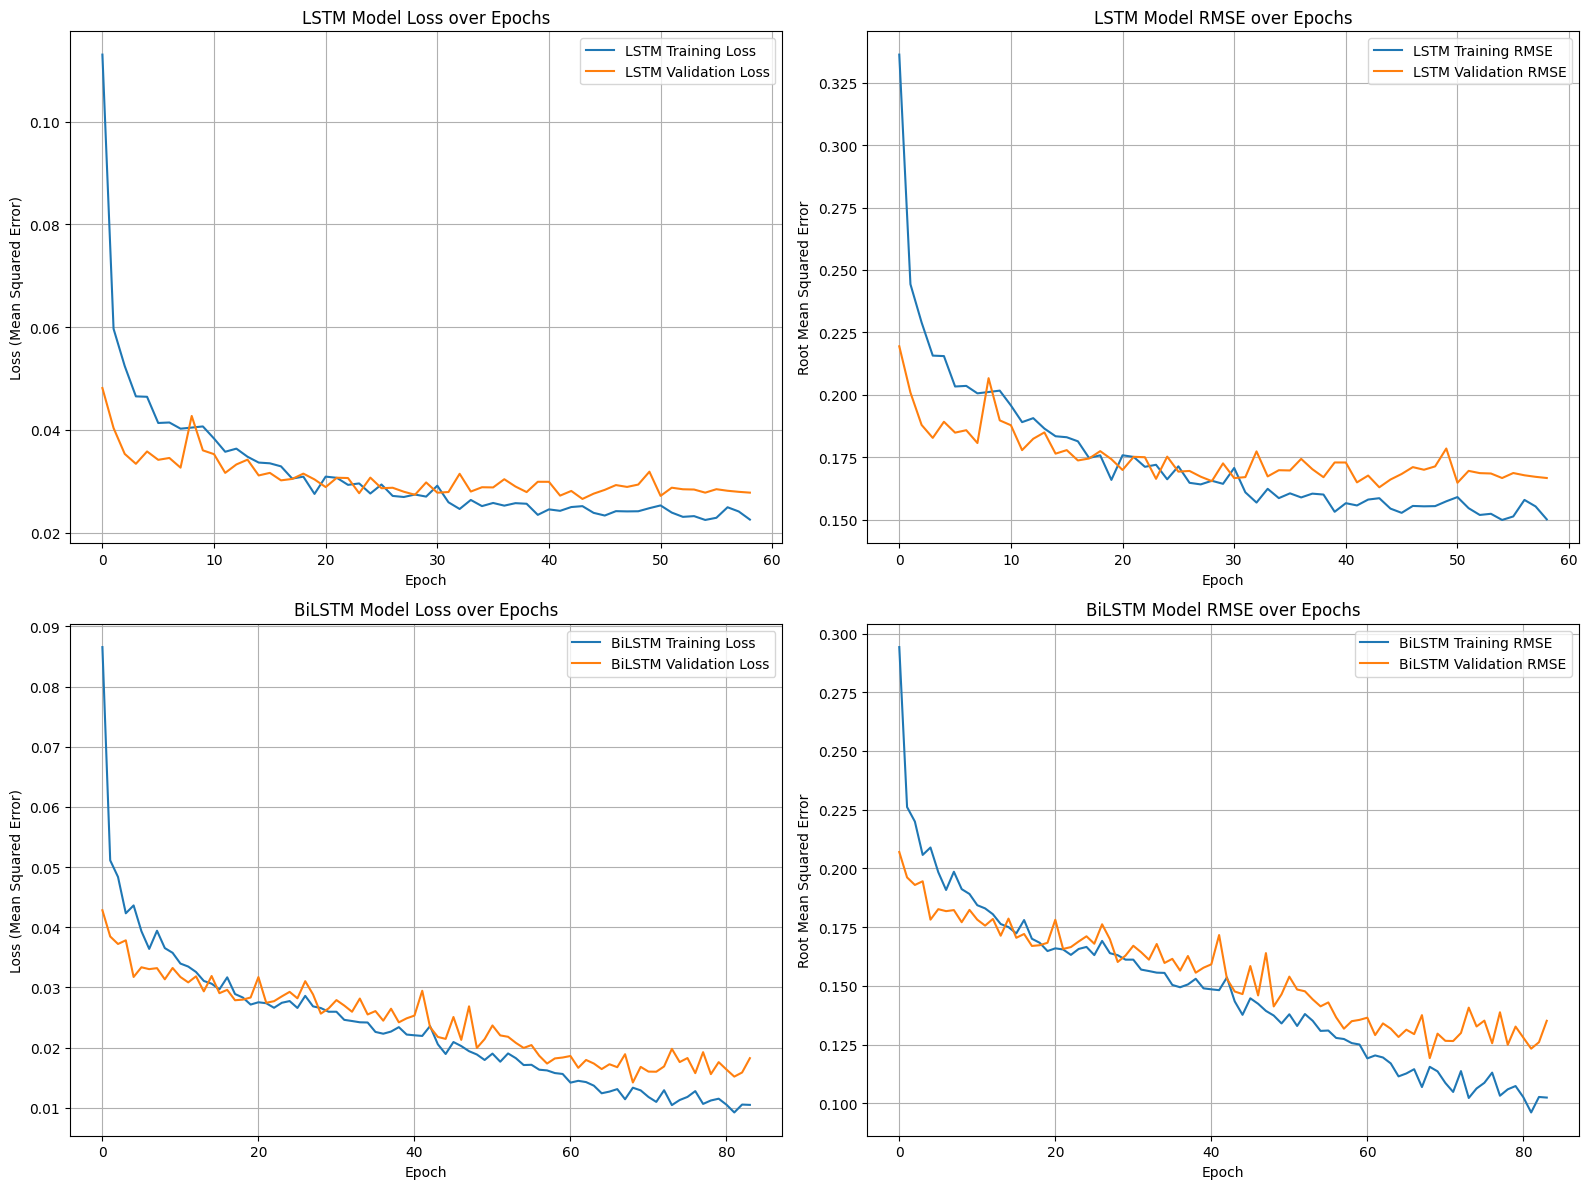

In [439]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# LSTM Loss Plot
plt.subplot(2, 2, 1)
plt.plot(lstm_model.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_model.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

# LSTM RMSE Plot
plt.subplot(2, 2, 2)
plt.plot(lstm_model.history['RootMeanSquaredError'], label='LSTM Training RMSE')
plt.plot(lstm_model.history['val_RootMeanSquaredError'], label='LSTM Validation RMSE')
plt.title('LSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

# BiLSTM Loss Plot
plt.subplot(2, 2, 3)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss')
plt.title('BiLSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

# BiLSTM RMSE Plot
plt.subplot(2, 2, 4)
plt.plot(history_bilstm.history['RootMeanSquaredError'], label='BiLSTM Training RMSE')
plt.plot(history_bilstm.history['val_RootMeanSquaredError'], label='BiLSTM Validation RMSE')
plt.title('BiLSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

hyperparameter tuning

In [442]:
!pip install keras-tuner

In [443]:
from keras_tuner import HyperModel, RandomSearch
print("Imported HyperModel and RandomSearch from keras_tuner.")

Imported HyperModel and RandomSearch from keras_tuner.


In [445]:
def build_model_lstm_tuned(hp):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second LSTM layer
    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Third LSTM layer
    model.add(LSTM(units=hp.Int('lstm_units_3', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(y_train.shape[1]))

    # Compile the model
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=['RootMeanSquaredError'])

    print("Defined build_model_lstm_tuned function.")
    return model

In [446]:
tuner_lstm = RandomSearch(
    build_model_lstm_tuned,
    objective='val_RootMeanSquaredError',
    max_trials=10, # Number of different hyperparameter combinations to try
    executions_per_trial=1, # Number of models to train for each trial
    directory='keras_tuner_dir',
    project_name='lstm_model_tuning_optimized'
)

print("Searching for best hyperparameters for LSTM model...")
tuner_lstm.search(X_train, y_train, epochs=50, validation_split=0.25, callbacks=[early_stopping])

print("LSTM Hyperparameter Search Complete.")

best_hps_lstm = tuner_lstm.get_best_hyperparameters(num_trials=1)[0]
print(f"Optimal lstm_units_1: {best_hps_lstm.get('lstm_units_1')}")
print(f"Optimal lstm_units_2: {best_hps_lstm.get('lstm_units_2')}")
print(f"Optimal lstm_units_3: {best_hps_lstm.get('lstm_units_3')}")
print(f"Optimal dropout_1: {best_hps_lstm.get('dropout_1')}")
print(f"Optimal dropout_2: {best_hps_lstm.get('dropout_2')}")
print(f"Optimal dropout_3: {best_hps_lstm.get('dropout_3')}")
print(f"Optimal learning_rate: {best_hps_lstm.get('learning_rate')}")

model_lstm_tuned = tuner_lstm.get_best_models(num_models=1)[0]
lstm_tuned_evaluation = model_lstm_tuned.evaluate(X_test, y_test, verbose=0)
lstm_tuned_rmse = lstm_tuned_evaluation[1]
print(f"Tuned LSTM Model RMSE: {lstm_tuned_rmse:.4f}")

Trial 10 Complete [00h 00m 42s]
val_RootMeanSquaredError: 0.18354302644729614

Best val_RootMeanSquaredError So Far: 0.16874372959136963
Total elapsed time: 00h 06m 43s
LSTM Hyperparameter Search Complete.
Optimal lstm_units_1: 96
Optimal lstm_units_2: 128
Optimal lstm_units_3: 128
Optimal dropout_1: 0.4
Optimal dropout_2: 0.30000000000000004
Optimal dropout_3: 0.30000000000000004
Optimal learning_rate: 0.0017701069670326775
Defined build_model_lstm_tuned function.
Tuned LSTM Model RMSE: 0.1409


Defined build_model_lstm_tuned function.


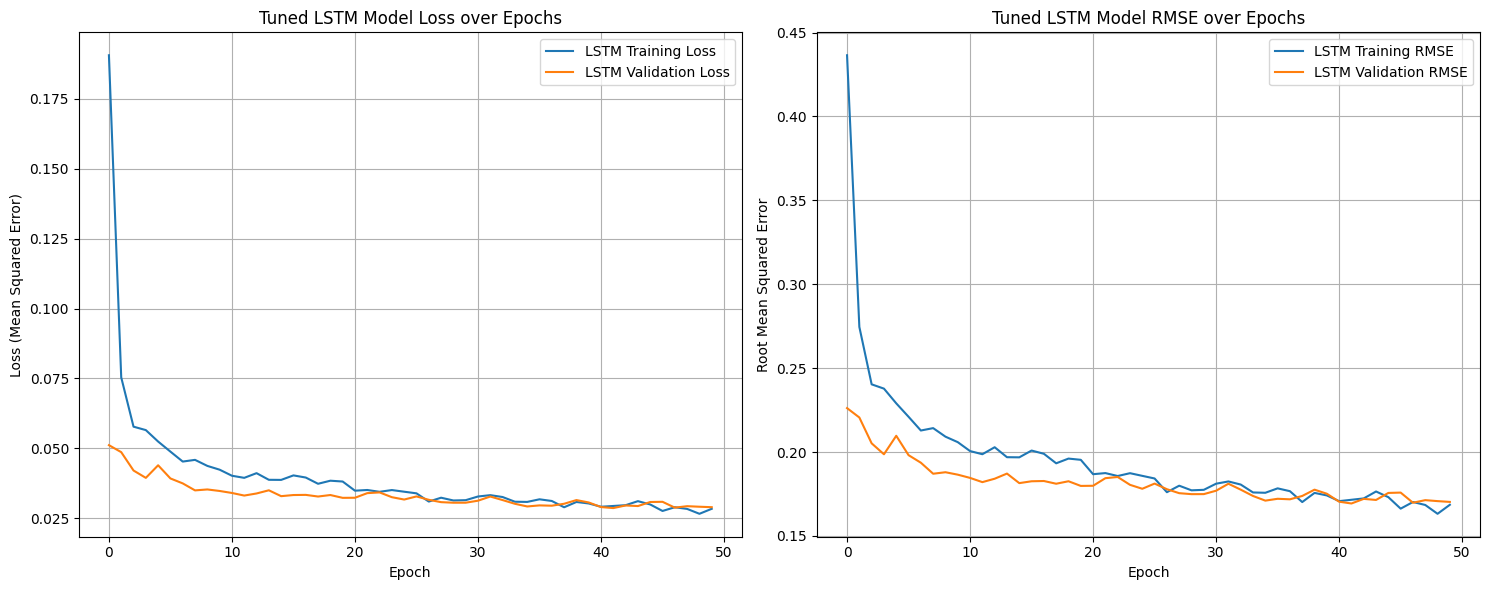

In [451]:
import matplotlib.pyplot as plt

# Get the best hyperparameters for the LSTM model
best_hps_lstm = tuner_lstm.get_best_hyperparameters(num_trials=1)[0]

# Build a new LSTM model with the best hyperparameters
model_lstm_tuned_for_history = build_model_lstm_tuned(best_hps_lstm)

# Train the model and capture its history
history_lstm_tuned = model_lstm_tuned_for_history.fit(
    X_train, y_train, epochs=50, validation_split=0.25, callbacks=[early_stopping], verbose=0
)

# Plotting training history for Tuned LSTM model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm_tuned.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm_tuned.history['val_loss'], label='LSTM Validation Loss')
plt.title('Tuned LSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_lstm_tuned.history['RootMeanSquaredError'], label='LSTM Training RMSE')
plt.plot(history_lstm_tuned.history['val_RootMeanSquaredError'], label='LSTM Validation RMSE')
plt.title('Tuned LSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Defined build_model_bilstm_tuned function.


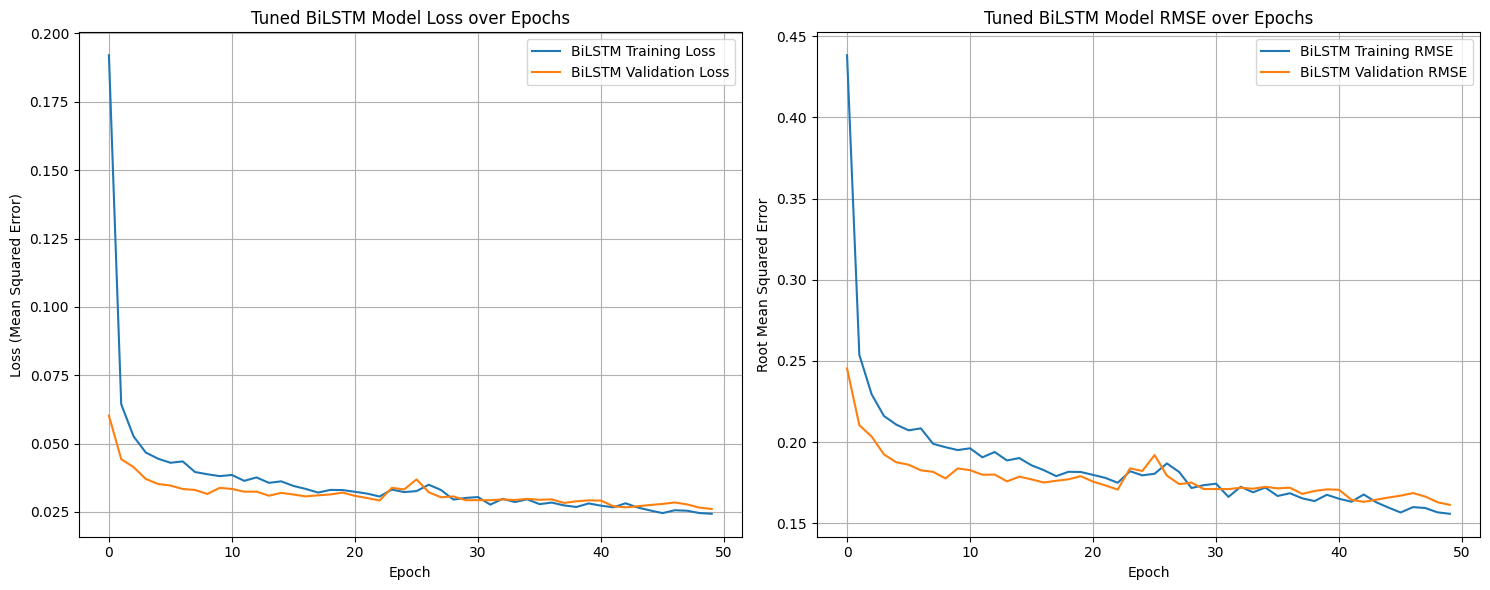

In [452]:
import matplotlib.pyplot as plt

# Get the best hyperparameters for the BiLSTM model
best_hps_bilstm = tuner_bilstm.get_best_hyperparameters(num_trials=1)[0]

# Build a new BiLSTM model with the best hyperparameters
model_bilstm_tuned_for_history = build_model_bilstm_tuned(best_hps_bilstm)

# Train the model and capture its history
history_bilstm_tuned = model_bilstm_tuned_for_history.fit(
    X_train, y_train, epochs=50, validation_split=0.25, callbacks=[early_stopping], verbose=0
)

# Plotting training history for Tuned BiLSTM model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bilstm_tuned.history['loss'], label='BiLSTM Training Loss')
plt.plot(history_bilstm_tuned.history['val_loss'], label='BiLSTM Validation Loss')
plt.title('Tuned BiLSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_bilstm_tuned.history['RootMeanSquaredError'], label='BiLSTM Training RMSE')
plt.plot(history_bilstm_tuned.history['val_RootMeanSquaredError'], label='BiLSTM Validation RMSE')
plt.title('Tuned BiLSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [447]:
def build_model_bilstm_tuned(hp):
    model = Sequential()

    # First Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(units=hp.Int('bilstm_units_1', min_value=32, max_value=128, step=32), return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout_bilstm_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(units=hp.Int('bilstm_units_2', min_value=32, max_value=128, step=32), return_sequences=True)))
    model.add(Dropout(hp.Float('dropout_bilstm_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Third Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(units=hp.Int('bilstm_units_3', min_value=32, max_value=128, step=32), return_sequences=False)))
    model.add(Dropout(hp.Float('dropout_bilstm_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(y_train.shape[1]))

    # Compile the model
    learning_rate = hp.Float('learning_rate_bilstm', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=['RootMeanSquaredError'])

    print("Defined build_model_bilstm_tuned function.")
    return model

In [448]:
tuner_bilstm = RandomSearch(
    build_model_bilstm_tuned,
    objective='val_RootMeanSquaredError',
    max_trials=10, # Number of different hyperparameter combinations to try
    executions_per_trial=1, # Number of models to train for each trial
    directory='keras_tuner_dir',
    project_name='bilstm_model_tuning_optimized'
)

print("Searching for best hyperparameters for BiLSTM model...")
tuner_bilstm.search(X_train, y_train, epochs=50, validation_split=0.25, callbacks=[early_stopping])

print("BiLSTM Hyperparameter Search Complete.")

best_hps_bilstm = tuner_bilstm.get_best_hyperparameters(num_trials=1)[0]
print(f"Optimal bilstm_units_1: {best_hps_bilstm.get('bilstm_units_1')}")
print(f"Optimal bilstm_units_2: {best_hps_bilstm.get('bilstm_units_2')}")
print(f"Optimal bilstm_units_3: {best_hps_bilstm.get('bilstm_units_3')}")
print(f"Optimal dropout_bilstm_1: {best_hps_bilstm.get('dropout_bilstm_1')}")
print(f"Optimal dropout_bilstm_2: {best_hps_bilstm.get('dropout_bilstm_2')}")
print(f"Optimal dropout_bilstm_3: {best_hps_bilstm.get('dropout_bilstm_3')}")
print(f"Optimal learning_rate_bilstm: {best_hps_bilstm.get('learning_rate_bilstm')}")

model_bilstm_tuned = tuner_bilstm.get_best_models(num_models=1)[0]
bilstm_tuned_evaluation = model_bilstm_tuned.evaluate(X_test, y_test, verbose=0)
bilstm_tuned_rmse = bilstm_tuned_evaluation[1]
print(f"Tuned BiLSTM Model RMSE: {bilstm_tuned_rmse:.4f}")

Trial 10 Complete [00h 01m 14s]
val_RootMeanSquaredError: 0.17918871343135834

Best val_RootMeanSquaredError So Far: 0.16273653507232666
Total elapsed time: 00h 10m 50s
BiLSTM Hyperparameter Search Complete.
Optimal bilstm_units_1: 32
Optimal bilstm_units_2: 96
Optimal bilstm_units_3: 96
Optimal dropout_bilstm_1: 0.2
Optimal dropout_bilstm_2: 0.1
Optimal dropout_bilstm_3: 0.4
Optimal learning_rate_bilstm: 0.002112765859059582
Defined build_model_bilstm_tuned function.
Tuned BiLSTM Model RMSE: 0.1401


In [458]:
print(f"Linear Regression Model RMSE: {rmse_linear:.4f}")
print(f"Tuned LSTM Model RMSE: {lstm_tuned_rmse:.4f}")
print(f"Tuned BiLSTM Model RMSE: {bilstm_tuned_rmse:.4f}")

# Find the model with the lowest RMSE
min_rmse = min(rmse_linear, lstm_tuned_rmse, bilstm_tuned_rmse)

if min_rmse == rmse_linear:
    print("The Linear Regression model has the lowest RMSE.")
elif min_rmse == lstm_tuned_rmse:
    print("The Tuned LSTM model has the lowest RMSE.")
else:
    print("The Tuned BiLSTM model has the lowest RMSE.")

Linear Regression Model RMSE: 0.2075
Tuned LSTM Model RMSE: 0.1409
Tuned BiLSTM Model RMSE: 0.1401
The Tuned BiLSTM model has the lowest RMSE.


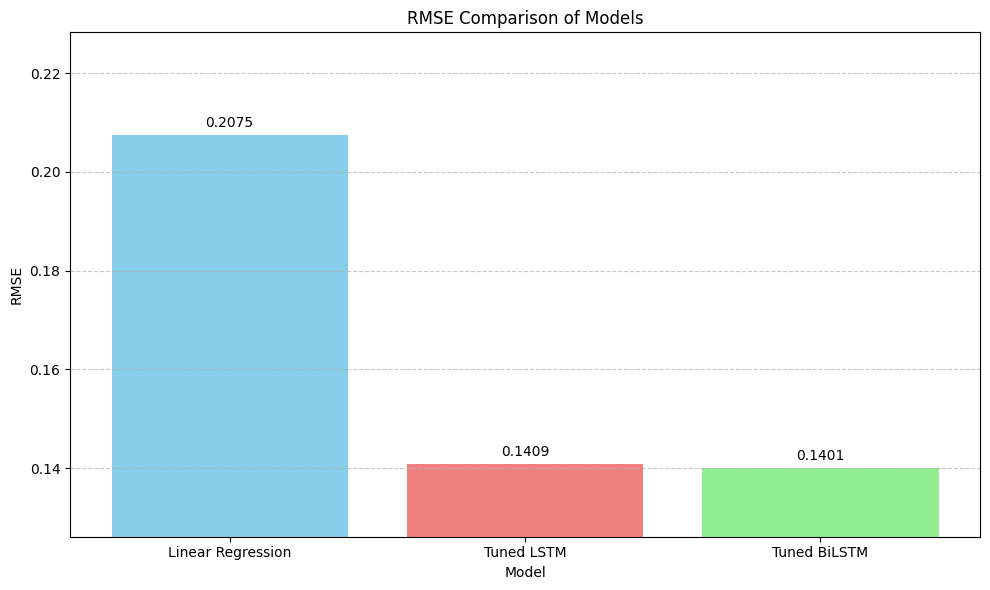

In [459]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their RMSE values
models = ['Linear Regression', 'Tuned LSTM', 'Tuned BiLSTM']
rmse_values = [rmse_linear, lstm_tuned_rmse, bilstm_tuned_rmse]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.ylim(min(rmse_values) * 0.9, max(rmse_values) * 1.1) # Adjust y-axis limit for better visualization

# Add RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.001, f'{value:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()